<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [1]:
import numpy as np

mu = 180 # mean pancake example
sigma = 5 # standard deviation pancake exmple

sample = np.random.normal(mu, sigma, 1000)

In [2]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01
print(mu)
print(np.mean(sample))

180
179.9899062835227


In [3]:
# Verify the variance of our sample
print(abs(sigma - np.std(sample, ddof=1)) < 1) # delta degrees of freedom
print(mu)
print(np.std(sample, ddof=1))

True
180
4.9282957533546625


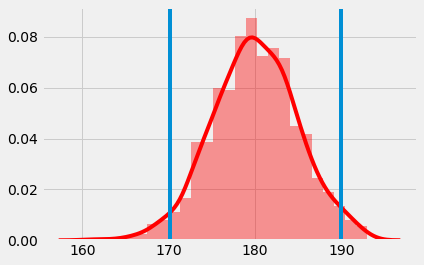

In [4]:
import seaborn as sns
from matplotlib import style
%matplotlib inline 

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

In [5]:
np.percentile(sample, 97.5)

189.93576040825639

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [6]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

In [7]:
t_df10

array([-1.99329855,  0.18989578, -0.09460016, -0.26752237, -0.86395116,
       -0.54584896, -0.58909628,  0.18016726, -1.75800536,  0.02645091])

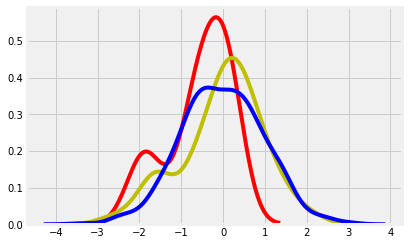

In [8]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [9]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.5715808882600171
Standard Deviation: 0.7306099955651719
Variance: 0.5337909656197405
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.022549227984524047
Standard Deviation: 0.987297741415589
Variance: 0.9747568302043232
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.019164561476823452
Standard Deviation: 0.981442333772009
Variance: 0.9632290545198475


In [10]:
import pandas as pd
# Missing LAR (no team roster page on NFL.com)
teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU',
        'IND','JAX','KC','LAC','MIA','MIN','NE','NO','NYG','NYJ','OAK','PHI',
        'PIT','SEA','SF','TB','TEN','WAS']    
df_list = []
for team in teams: 
    df = pd.read_html(f'http://www.nfl.com/teams/roster?team={team}')[1]
    df['Team'] = team
    df.columns = ['No','Name','Pos','Status','Height','Weight','Birthdate','Exp','College','Team']
    df_list.append(df)
    
final_df = pd.concat(df_list, ignore_index=True)
print(final_df.shape)
final_df.head()

(1941, 10)


,No,Name,Pos,Status,Height,Weight,Birthdate,Exp,College,Team
0,23,"Alford, Robert",CB,RES,"5'10""",186,11/1/1988,7,Southeastern Louisiana,ARI
1,97,"Allen, Zach",DE,ACT,"6'5""",285,8/20/1997,0,Boston College,ARI
2,32,"Baker, Budda",SS,ACT,"5'10""",195,1/10/1996,3,Washington,ARI
3,38,"Banjo, Chris",DB,ACT,"5'10""",207,2/26/1990,6,Southern Methodist,ARI
4,46,"Brewer, Aaron",LS,ACT,"6'5""",232,7/5/1990,8,San Diego State,ARI


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [11]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [12]:
burnerA = np.random.normal(180,5, 1000)
burnerB = np.random.normal(178.5, 4.25, 800)

In [13]:
for sample in [burnerA, burnerB]:
  print(f'Mean: {sample.mean()}')
  print(f'Standard Deviation: {sample.std()}')
  

Mean: 179.79291769237705
Standard Deviation: 5.03371943055713
Mean: 178.40321739108535
Standard Deviation: 4.301375649495437


In [14]:
tstat, pvalue = ttest_ind(burnerA, burnerB)
print(tstat)
print(pvalue)

6.200649013105294
6.958756981051623e-10


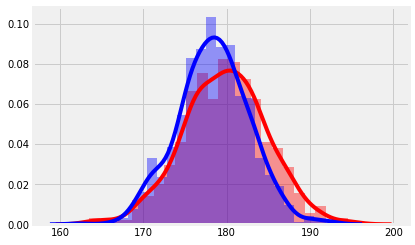

In [15]:
sns.distplot(burnerA, color='r')
sns.distplot(burnerB, color='b')

In [16]:
from sklearn.datasets import load_wine
import pandas as pd

X = load_wine()
X

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [17]:
wine = pd.DataFrame(X['data'], columns = X['feature_names'])
wine['origin'] = X['target']
print(wine.shape)
wine.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
wine.origin.value_counts()

1    71
0    59
2    48
Name: origin, dtype: int64

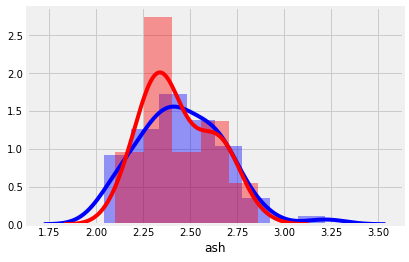

In [19]:
sns.distplot(wine[wine['origin'] == 0]['ash'], color = 'blue')
sns.distplot(wine[wine['origin'] == 2]['ash'], color = 'red')

In [20]:
tstat, pvalue = ttest_ind(wine[wine['origin'] == 0]['ash'], wine[wine['origin'] == 2]['ash'])
print(tstat)
print(pvalue)

0.4551468326841644
0.6499433346755791


/Users/JKMacBook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/JKMacBook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


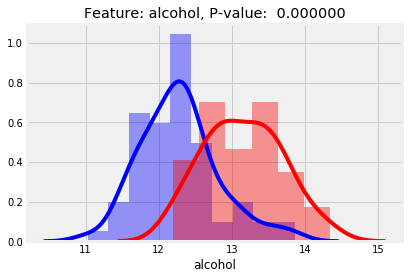

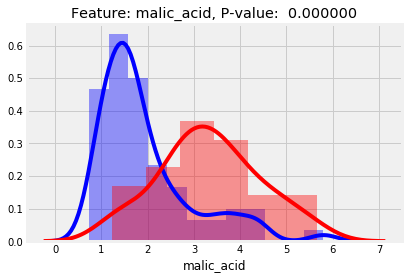

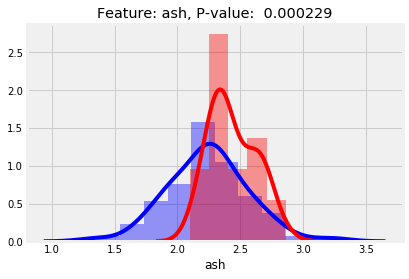

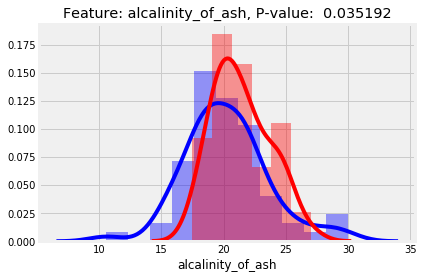

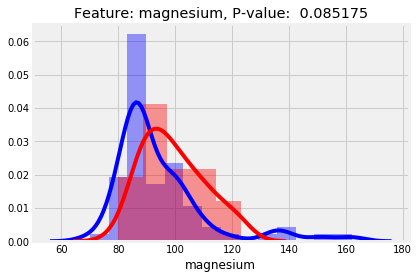

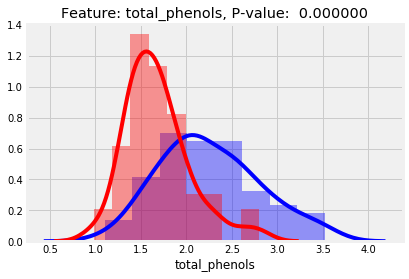

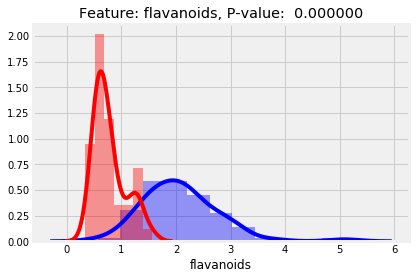

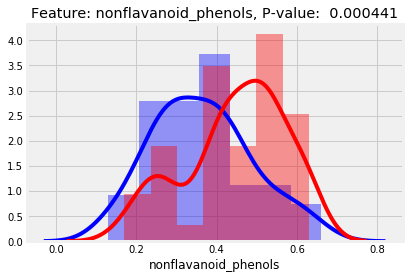

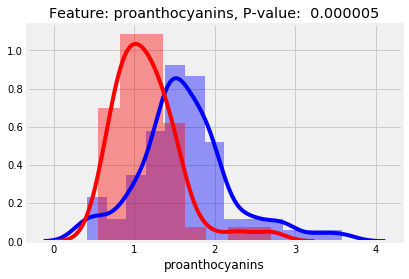

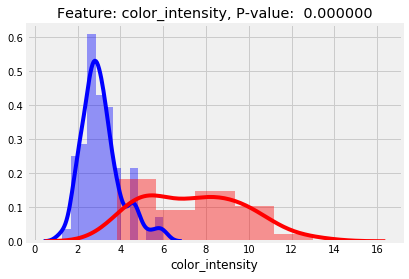

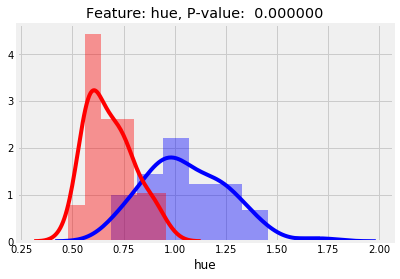

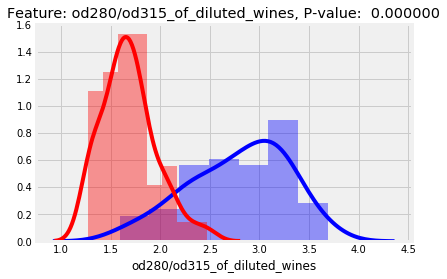

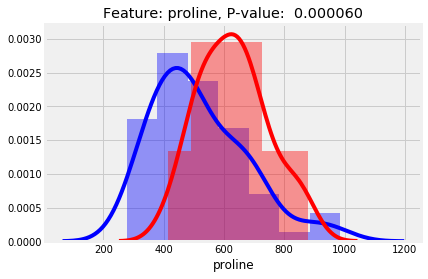

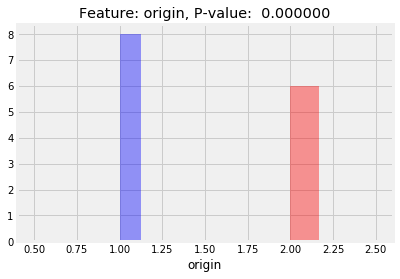

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

for feat in wine.columns:
  group1 = wine[wine['origin'] == 1][feat]
  group2 = wine[wine['origin'] == 2][feat]
  
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  _, pvalue = ttest_ind(group1, group2)
  
  plt.title(f'Feature: {feat}, P-value: {pvalue: 5f}')
  plt.figure()
  

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means